In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the data
df = pd.read_csv('District Wise Climate Vulnerability Indicators_Sample_Data.csv')

# Look at column names
print("\nColumn names:")
for col in df.columns:
    print(col)

# Look at first few rows
print("\nFirst few rows:")
print(df.head())


Column names:
Year (year)
State Code (state_code)
State Name (state_name)
District Code (district_code)
District Name (district_name)
Climate vulnerability index (climate_vul_in)
Marginal and small landholding (%) (mar_small_land)
Area covered under crop insurance (%) (area_crop_insur)
Proportion of the area under rainfed agriculture (area_rainfed_agri)
Total area of forest per 100 rural population (area_forest_per_hun_population)
Women participation in the workforce (%) (women_workforce)
Average days of employment provided per household under mgnrega in a year (%) (avg_days_employement)
Road density (road_density)
Functional health centres per thousand population (health_centre)
Infant mortality rate (infant_mortality)
Households with electricity (%) (household_electricity)
Households with the improved drinking water source (%) (household_drinking_water)
Yield variability of food grains (yield_variability)
Per capita income (per_capita_income)
Livestock per population (%) (livestock)

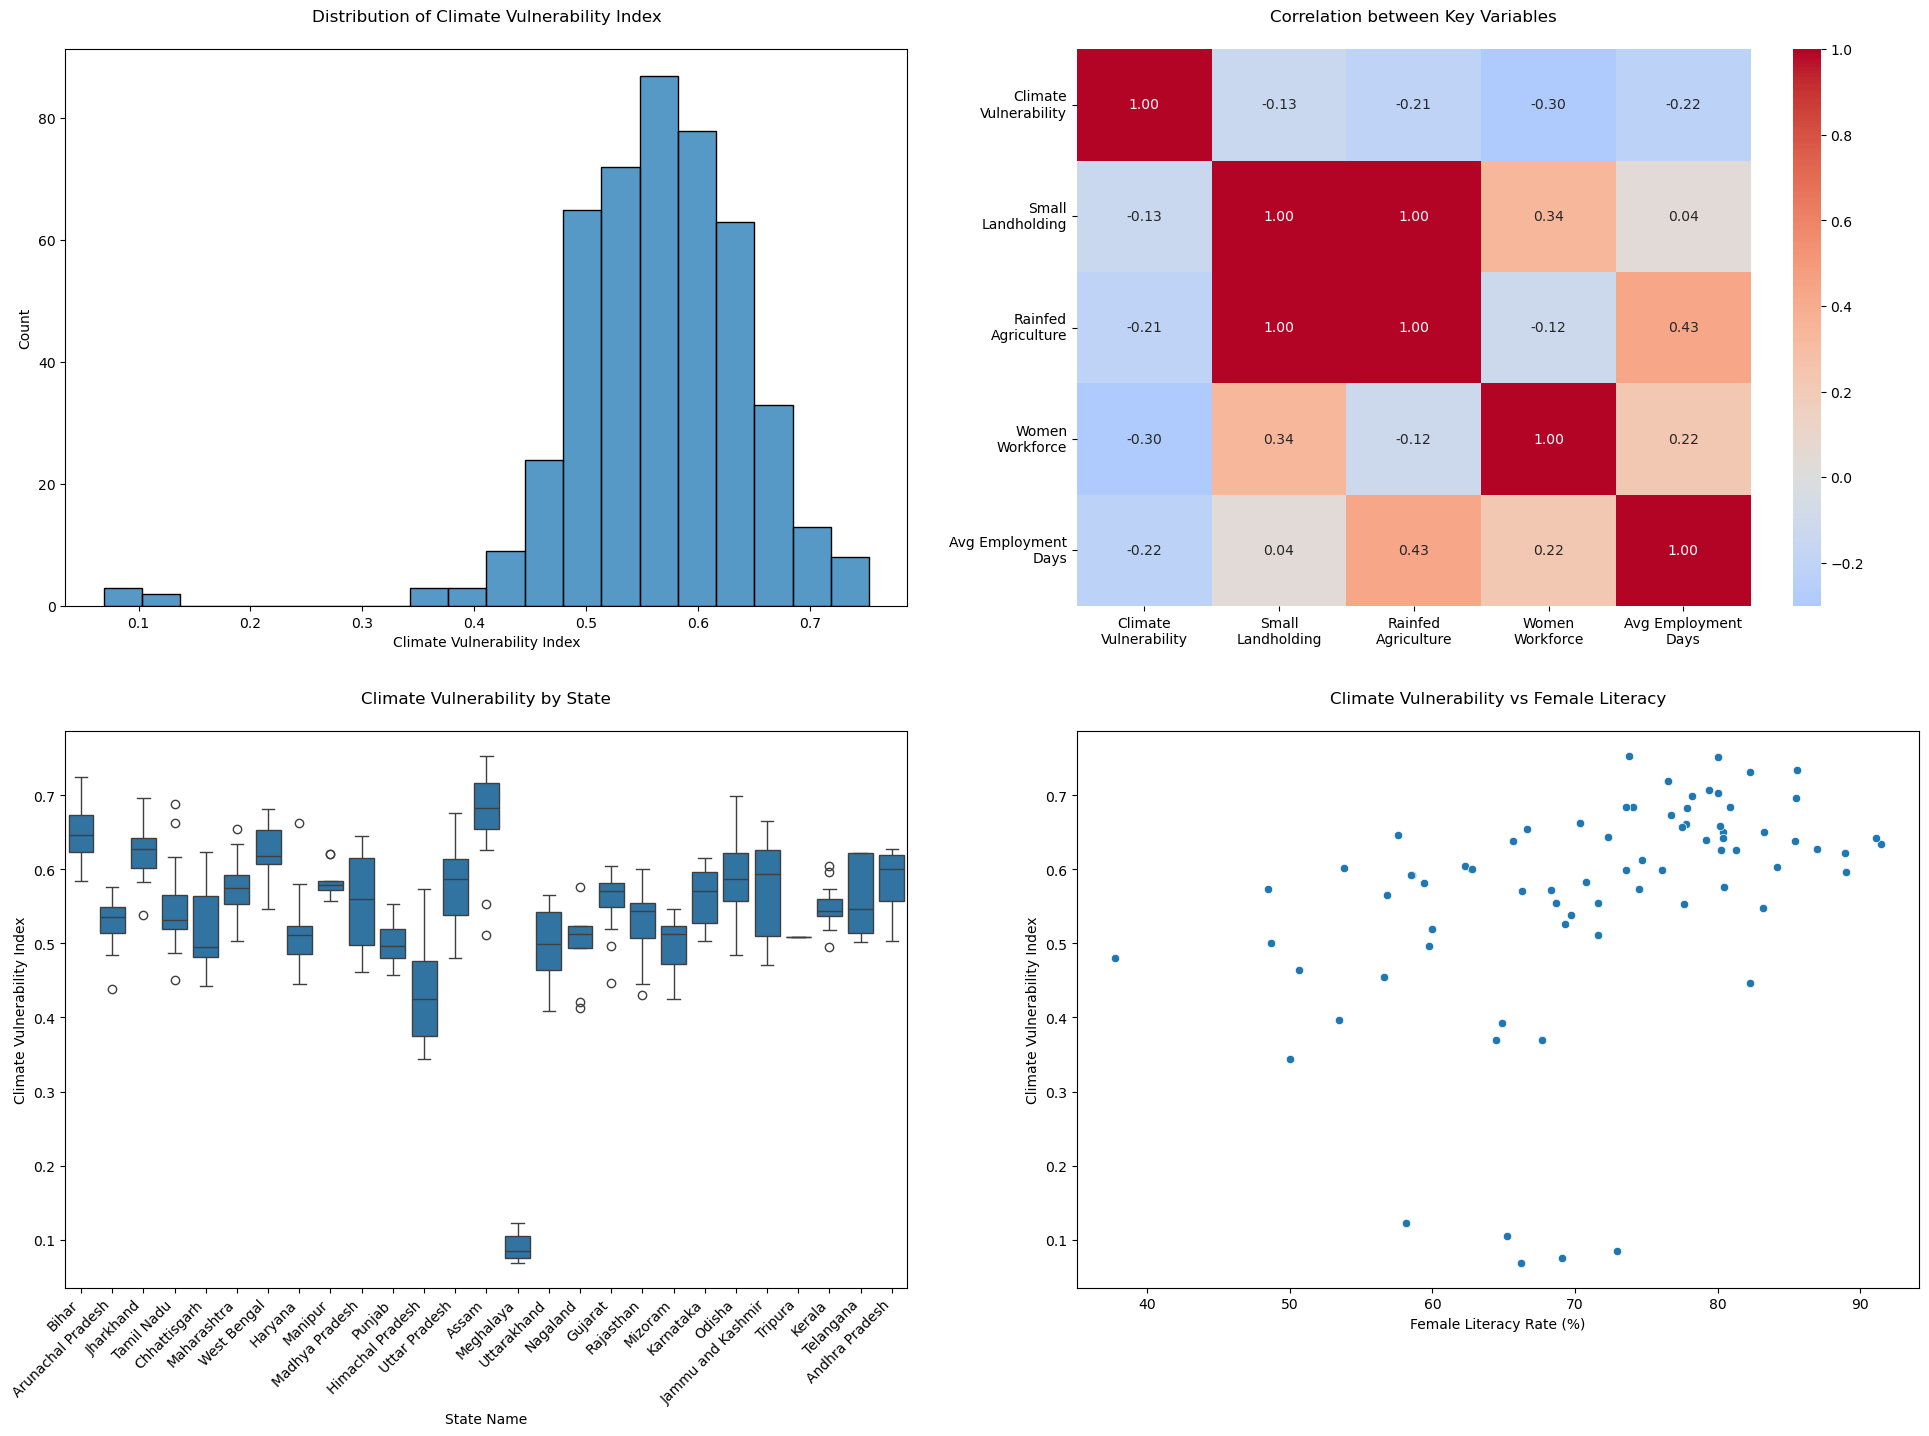

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('District Wise Climate Vulnerability Indicators_Sample_Data.csv')

# Create figure with larger size
fig = plt.figure(figsize=(20, 15))

# 1. Climate vulnerability index distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Climate vulnerability index (climate_vul_in)', bins=20)
plt.title('Distribution of Climate Vulnerability Index', pad=20, size=12)
plt.xlabel('Climate Vulnerability Index', size=10)
plt.ylabel('Count', size=10)

# 2. Correlation heatmap
plt.subplot(2, 2, 2)
key_vars = [
    'Climate vulnerability index (climate_vul_in)',
    'Marginal and small landholding (%) (mar_small_land)',
    'Proportion of the area under rainfed agriculture (area_rainfed_agri)',
    'Women participation in the workforce (%) (women_workforce)',
    'Average days of employment provided per household under mgnrega in a year (%) (avg_days_employement)'
]
# Create shorter labels for correlation matrix
labels = [
    'Climate\nVulnerability',
    'Small\nLandholding',
    'Rainfed\nAgriculture',
    'Women\nWorkforce',
    'Avg Employment\nDays'
]
key_vars = [col for col in key_vars if col in df.columns]
correlation_matrix = df[key_vars].corr()

# Plot correlation heatmap with improved labels
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='coolwarm', 
            center=0,
            xticklabels=labels,
            yticklabels=labels,
            fmt='.2f')
plt.title('Correlation between Key Variables', pad=20, size=12)
plt.xticks(rotation=0)
plt.yticks(rotation=0)

# 3. Box plot
plt.subplot(2, 2, 3)
sns.boxplot(data=df, x='State Name (state_name)', 
            y='Climate vulnerability index (climate_vul_in)')
plt.title('Climate Vulnerability by State', pad=20, size=12)
plt.xlabel('State Name', size=10)
plt.ylabel('Climate Vulnerability Index', size=10)
plt.xticks(rotation=45, ha='right')

# 4. Scatter plot
plt.subplot(2, 2, 4)
sns.scatterplot(data=df, 
                x='Female literacy rate (%) (female_literacy)',
                y='Climate vulnerability index (climate_vul_in)')
plt.title('Climate Vulnerability vs Female Literacy', pad=20, size=12)
plt.xlabel('Female Literacy Rate (%)', size=10)
plt.ylabel('Climate Vulnerability Index', size=10)

# Adjust layout to prevent overlap
plt.tight_layout(pad=3.0)
plt.show()

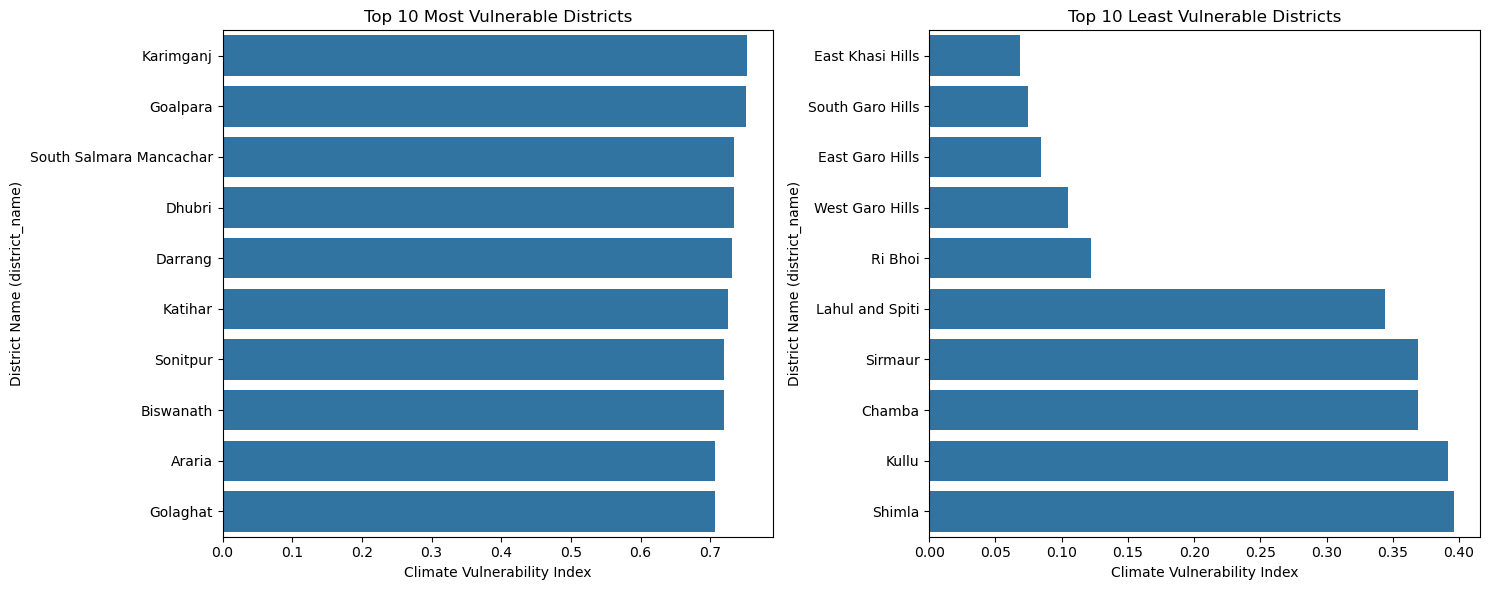

<Figure size 1200x800 with 0 Axes>

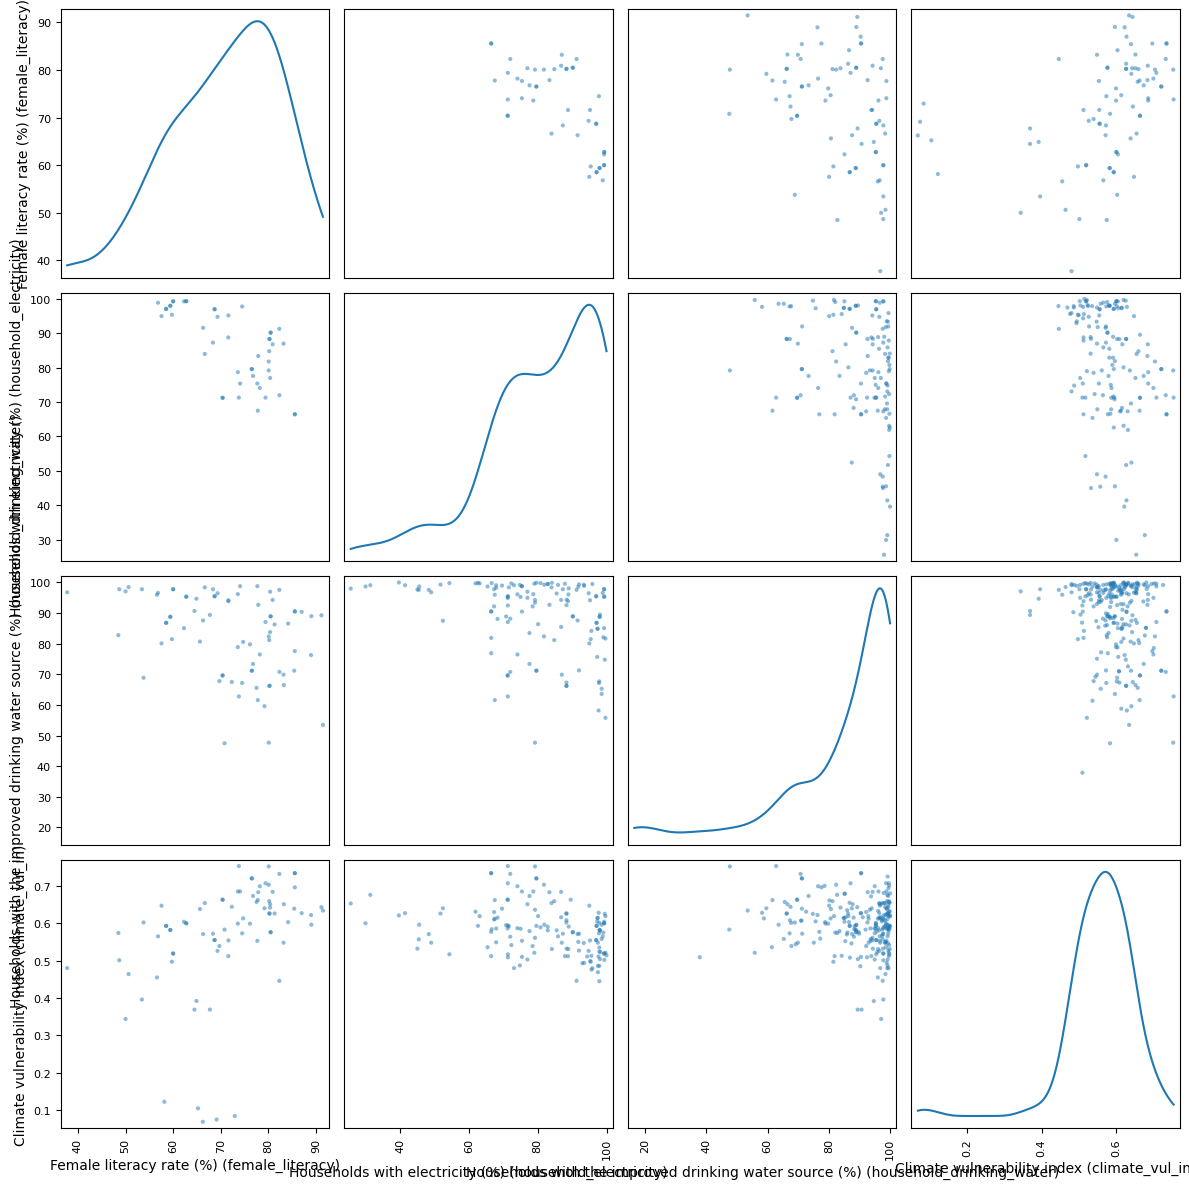

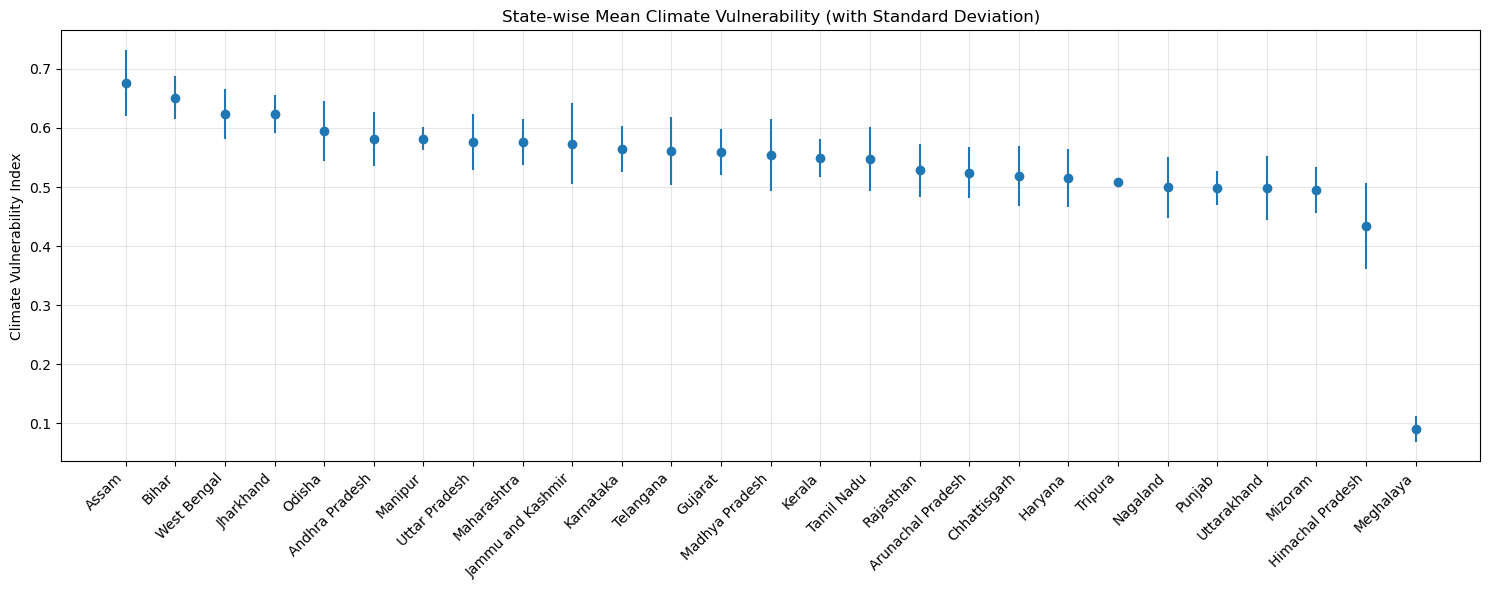

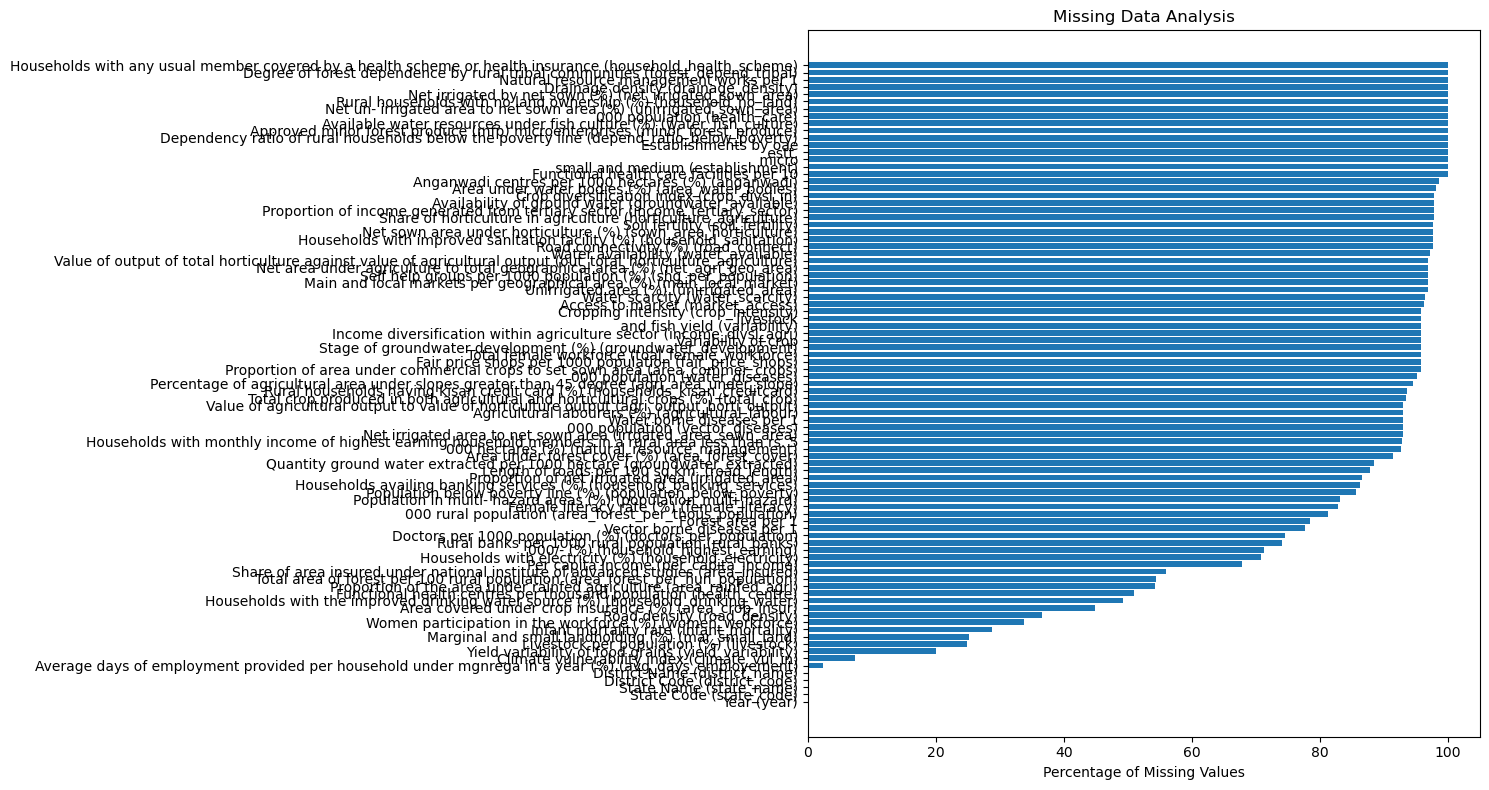


Summary of Key Findings:
-----------------------
Average Climate Vulnerability Index: 0.563
Most Vulnerable State: Assam
Least Vulnerable State: Meghalaya
Most Vulnerable District: Karimganj
Least Vulnerable District: East Khasi Hills


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the data
df = pd.read_csv('District Wise Climate Vulnerability Indicators_Sample_Data.csv')

# 1. Create a figure to analyze top 10 districts with highest and lowest vulnerability
plt.figure(figsize=(15, 6))

# Sort districts by vulnerability
top_districts = df.nlargest(10, 'Climate vulnerability index (climate_vul_in)')
bottom_districts = df.nsmallest(10, 'Climate vulnerability index (climate_vul_in)')

# Plot
plt.subplot(1, 2, 1)
sns.barplot(data=top_districts, 
            x='Climate vulnerability index (climate_vul_in)', 
            y='District Name (district_name)')
plt.title('Top 10 Most Vulnerable Districts')
plt.xlabel('Climate Vulnerability Index')

plt.subplot(1, 2, 2)
sns.barplot(data=bottom_districts, 
            x='Climate vulnerability index (climate_vul_in)', 
            y='District Name (district_name)')
plt.title('Top 10 Least Vulnerable Districts')
plt.xlabel('Climate Vulnerability Index')

plt.tight_layout()
plt.show()

# 2. Analyze relationship between multiple factors
plt.figure(figsize=(12, 8))
factors = [
    'Female literacy rate (%) (female_literacy)',
    'Households with electricity (%) (household_electricity)',
    'Households with the improved drinking water source (%) (household_drinking_water)',
    'Climate vulnerability index (climate_vul_in)'
]

# Create a scatter matrix for these factors
factors_present = [col for col in factors if col in df.columns]
pd.plotting.scatter_matrix(df[factors_present], figsize=(12, 12), diagonal='kde')
plt.tight_layout()
plt.show()

# 3. State-wise analysis
plt.figure(figsize=(15, 6))

# Calculate mean vulnerability by state
state_stats = df.groupby('State Name (state_name)').agg({
    'Climate vulnerability index (climate_vul_in)': ['mean', 'std', 'count']
}).sort_values(('Climate vulnerability index (climate_vul_in)', 'mean'), ascending=False)

# Plot mean vulnerability with error bars
plt.errorbar(x=range(len(state_stats)), 
            y=state_stats['Climate vulnerability index (climate_vul_in)']['mean'],
            yerr=state_stats['Climate vulnerability index (climate_vul_in)']['std'],
            fmt='o')

plt.xticks(range(len(state_stats)), state_stats.index, rotation=45, ha='right')
plt.title('State-wise Mean Climate Vulnerability (with Standard Deviation)')
plt.ylabel('Climate Vulnerability Index')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 4. Analyzing missing data patterns
plt.figure(figsize=(15, 8))
missing_data = df.isnull().sum().sort_values(ascending=True)
missing_data_pct = (missing_data / len(df) * 100).round(2)
missing_data = pd.concat([missing_data, missing_data_pct], axis=1)
missing_data.columns = ['Count', 'Percentage']

# Plot missing data percentages
plt.barh(range(len(missing_data)), missing_data['Percentage'])
plt.yticks(range(len(missing_data)), missing_data.index)
plt.xlabel('Percentage of Missing Values')
plt.title('Missing Data Analysis')
plt.tight_layout()
plt.show()

# 5. Print summary statistics for key indicators
print("\nSummary of Key Findings:")
print("-----------------------")
print(f"Average Climate Vulnerability Index: {df['Climate vulnerability index (climate_vul_in)'].mean():.3f}")
print(f"Most Vulnerable State: {state_stats.index[0]}")
print(f"Least Vulnerable State: {state_stats.index[-1]}")
print(f"Most Vulnerable District: {df.loc[df['Climate vulnerability index (climate_vul_in)'].idxmax(), 'District Name (district_name)']}")
print(f"Least Vulnerable District: {df.loc[df['Climate vulnerability index (climate_vul_in)'].idxmin(), 'District Name (district_name)']}")

<Figure size 1500x1500 with 0 Axes>

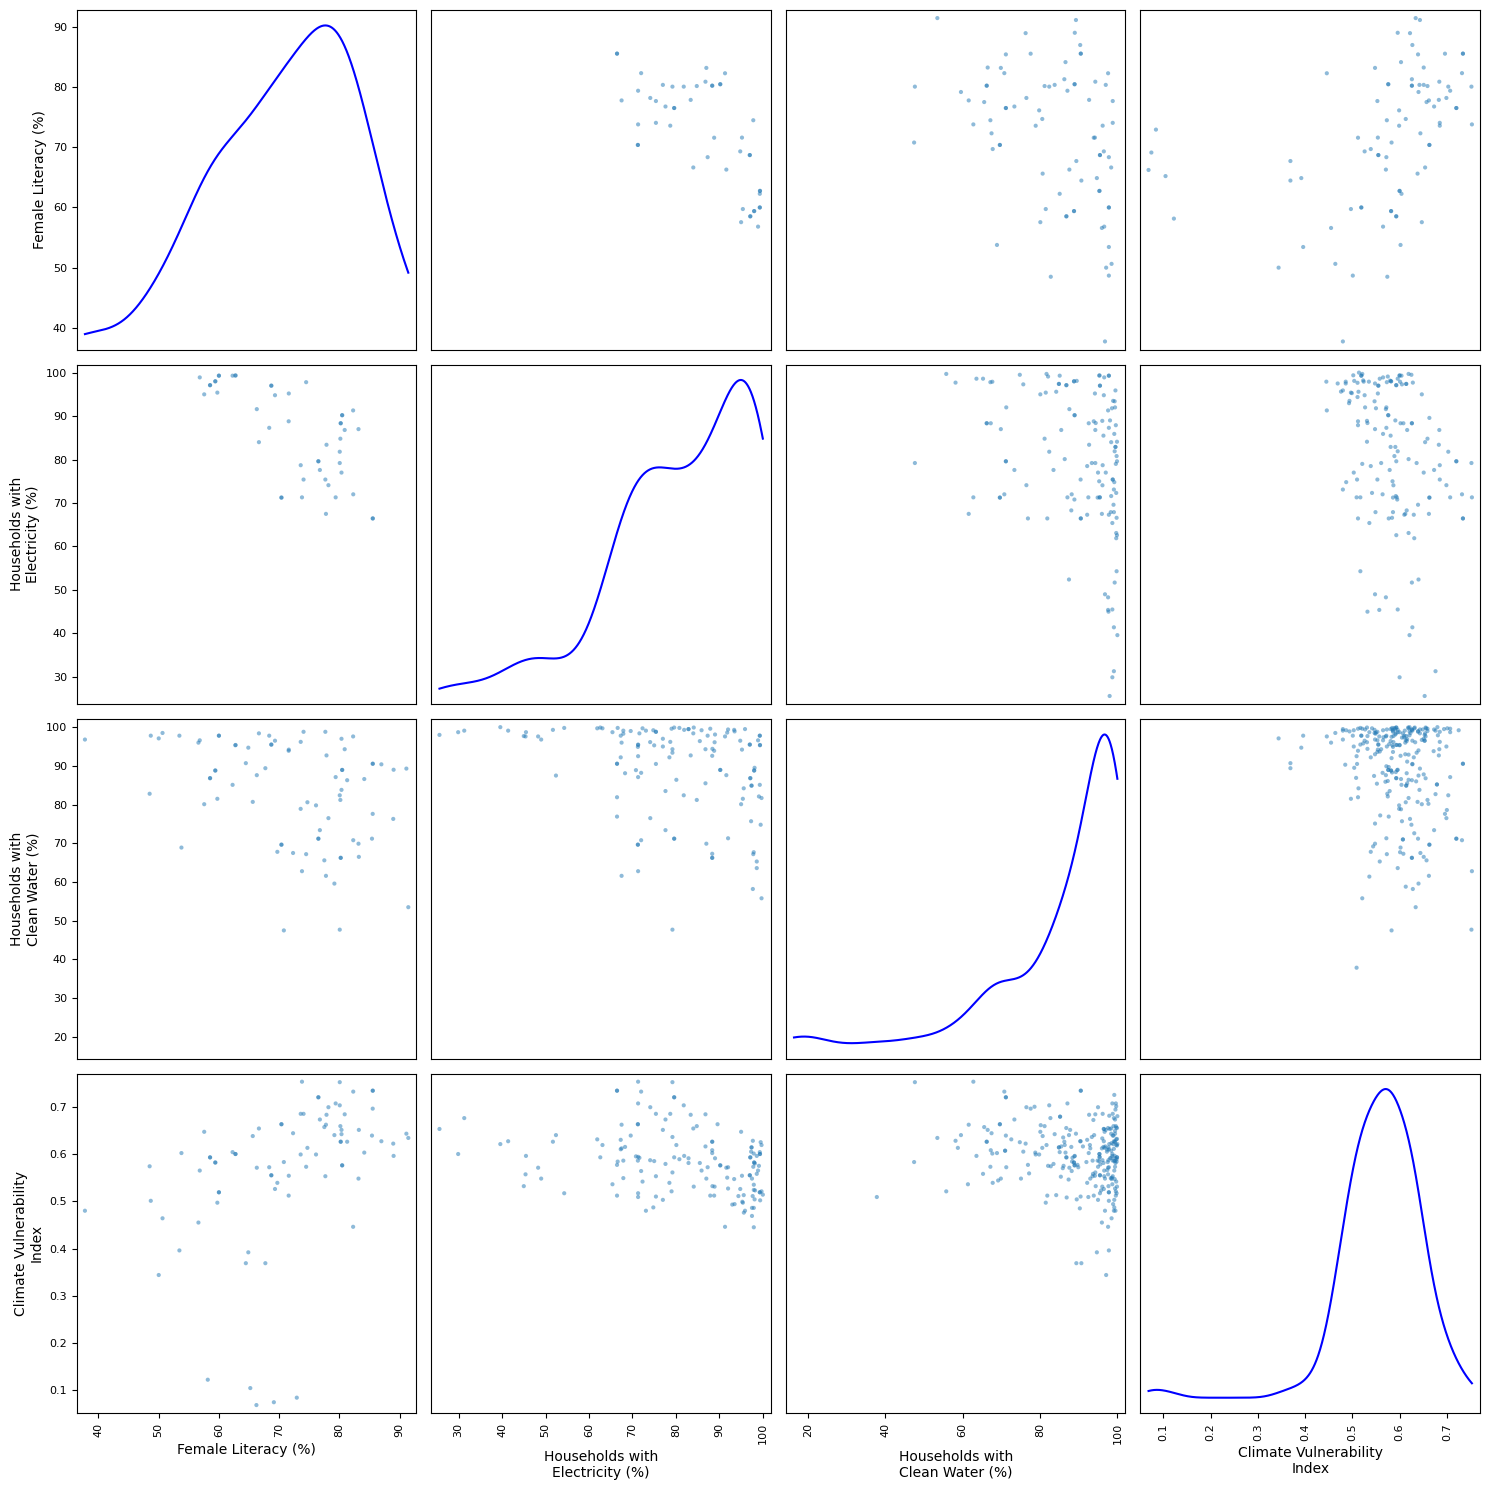

In [15]:
# Select columns and give them shorter names for plotting
plot_data = df[[
    'Female literacy rate (%) (female_literacy)',
    'Households with electricity (%) (household_electricity)',
    'Households with the improved drinking water source (%) (household_drinking_water)',
    'Climate vulnerability index (climate_vul_in)'
]].copy()

# Rename columns for better labels
plot_data.columns = [
    'Female Literacy (%)',
    'Households with\nElectricity (%)',
    'Households with\nClean Water (%)',
    'Climate Vulnerability\nIndex'
]

# Create scatter matrix
fig = plt.figure(figsize=(15, 15))
pd.plotting.scatter_matrix(
    plot_data,
    figsize=(15, 15),
    diagonal='kde',
    grid=True,
    density_kwds={'color': 'blue'},
    hist_kwds={'bins': 20}
)

# Adjust layout and display
plt.tight_layout()
plt.show()